## Vacuum slab calculations

- Build a vacuum-slab for Al using the python ASE (atomic simulation environment) library.
- Build 100, 110 and 111 surfaces from fcc Al at the calculated lattice parameter.
- Calculate surface formation energies.
- Compute the extent of surface relaxation.
- Determine whether the surface will oxidise.

## Aluminium

### 1. Build vacuum-slab with ASE

In [1]:
#!conda install -c conda-forge ase
from ase.build import fcc111, fcc110, fcc100
slab = fcc111('Al', size=(2,2,7), vacuum=10.0)

print(slab.cell)
print(slab.positions)

Cell([[5.727564927611035, 0.0, 0.0], [2.8637824638055176, 4.960216729135935, 0.0], [0.0, 0.0, 34.02961154130791]])
[[ 0.          0.         10.        ]
 [ 2.86378246  0.         10.        ]
 [ 1.43189123  2.48010836 10.        ]
 [ 4.2956737   2.48010836 10.        ]
 [ 1.43189123  0.82670279 12.33826859]
 [ 4.2956737   0.82670279 12.33826859]
 [ 2.86378246  3.30681115 12.33826859]
 [ 5.72756493  3.30681115 12.33826859]
 [ 0.          1.65340558 14.67653718]
 [ 2.86378246  1.65340558 14.67653718]
 [ 1.43189123  4.13351394 14.67653718]
 [ 4.2956737   4.13351394 14.67653718]
 [ 0.          0.         17.01480577]
 [ 2.86378246  0.         17.01480577]
 [ 1.43189123  2.48010836 17.01480577]
 [ 4.2956737   2.48010836 17.01480577]
 [ 1.43189123  0.82670279 19.35307436]
 [ 4.2956737   0.82670279 19.35307436]
 [ 2.86378246  3.30681115 19.35307436]
 [ 5.72756493  3.30681115 19.35307436]
 [ 0.          1.65340558 21.69134295]
 [ 2.86378246  1.65340558 21.69134295]
 [ 1.43189123  4.13351394 2

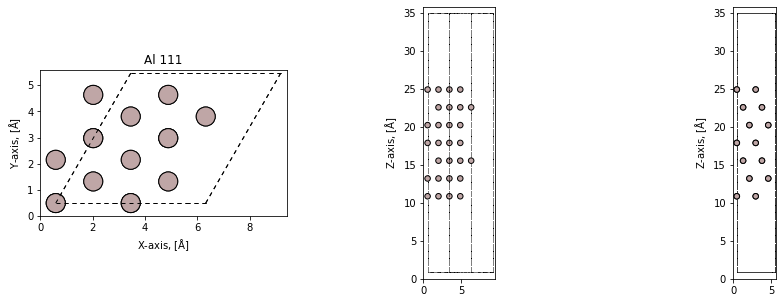

In [3]:
# Visualise the structure 
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
fig, axarr = plt.subplots(1, 3, figsize=(15, 5))
plot_atoms(slab, axarr[0], radii=0.3, rotation=('0x,0y,0z'))
plot_atoms(slab, axarr[1], radii=0.3, rotation=('90x,0y,0z'))
plot_atoms(slab, axarr[2], radii=0.3, rotation=('90x,90y,0z'))
axarr[0].set_title("Al 111")
axarr[0].set_xlabel("X-axis, [$\mathrm{\AA}$]")
axarr[0].set_ylabel("Y-axis, [$\mathrm{\AA}$]")
axarr[1].set_ylabel("Z-axis, [$\mathrm{\AA}$]")
axarr[2].set_ylabel("Z-axis, [$\mathrm{\AA}$]")
plt.show()


### 2. Build 100, 110, and 111 Al surfaces using the PBE relaxed bulk lattice lattice parameter

Building the slabs, consider:
-  whether the slabs have mirror plane or inversion symmetery. Our model should consist of two identical surfaces so the slab should be centro-symmetric.
- The energy of the surface should be converged with the respect to the number of monolayers. The number required with likely between 5 and 10. 
- For the vacuum gap, a separation of 10-20 Angstrom is usually sufficient. Again this should be converged.

In [4]:
#fcc lattice vector to alatt:
calc_alatt=4.04292971

slab100 = fcc100('Al', size=(2,2,7),  vacuum=10.0, a=calc_alatt)
slab110 = fcc110('Al', size=(2,2,7), vacuum=10.0, a=calc_alatt)
slab111 = fcc111('Al', size=(2,2,5), vacuum=10.0, a=calc_alatt)

In [5]:
def plot_slab(slab, name_):
    fig, axarr = plt.subplots(1, 3, figsize=(15, 5))
    plot_atoms(slab, axarr[0], radii=0.3, rotation=('0x,0y,0z'))
    plot_atoms(slab, axarr[1], radii=0.3, rotation=('90x,0y,0z'))
    plot_atoms(slab, axarr[2], radii=0.3, rotation=('90x,90y,0z'))
    axarr[0].set_title("Al vacuum slab "+str(name_))
    axarr[0].set_xlabel("X-axis, [$\mathrm{\AA}$]")
    axarr[0].set_ylabel("Y-axis, [$\mathrm{\AA}$]")
    axarr[1].set_ylabel("Z-axis, [$\mathrm{\AA}$]")
    axarr[2].set_ylabel("Z-axis, [$\mathrm{\AA}$]")
    plt.show()

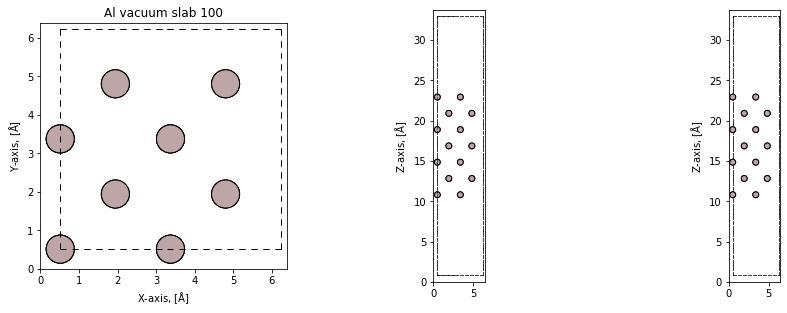

In [11]:
plot_slab(slab100, 100)

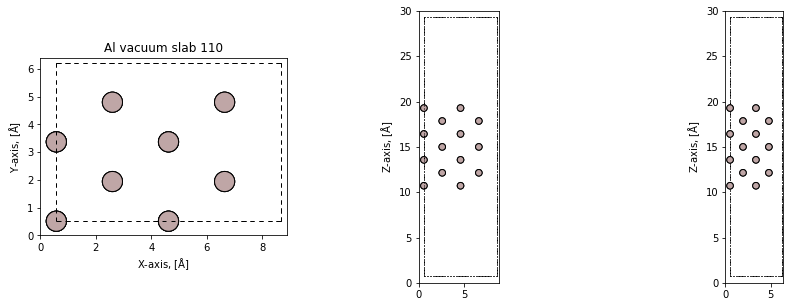

In [12]:
plot_slab(slab110, 110)

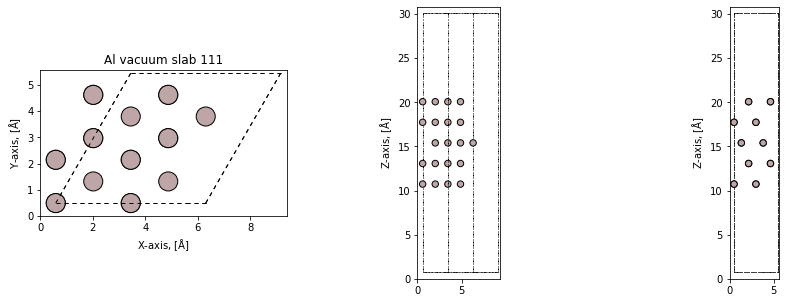

In [13]:
plot_slab(slab111, 111)

### 3. Surface formation energy

Find the surface formation energy, 
$$\gamma^{(i)}  = \frac{E_\text{surf}^{(i)} - E_\text{bulk}}{2A}\,,$$

of surface $i$, for $i$ in the set of low Miller index planes (100), (110), and (111). $E_\text{surf}$ is the energy per vacuum-slab of a particular surface termination. $E_\text{bulk}$ is the energy of the equivalent number of atoms. Surface energies are calculated per area $A$. The factor of two is because the surface model has two identical terminations. 

Find $\gamma_{111}$, $\gamma_{110}$, $\gamma_{100}$ by computing $E_\text{surf}$ and $E_\text{bulk}$ with DFT, and remembering the area of a paralellogram is $A = \left\lVert\hat{a}\times\hat{b}\right\rVert$. For the DFT calculations we can start by writing the vacuum-slab coordinates to file:

In [14]:
from ase.io import write
write("~/Documents/teaching/computationalthermodynamics/lab04/slab111.dat", slab111, format='espresso-in')
write("~/Documents/teaching/computationalthermodynamics/lab04/slab110.dat", slab110, format='espresso-in')
write("~/Documents/teaching/computationalthermodynamics/lab04/slab100.dat", slab100, format='espresso-in')

In [15]:
# Write a function to calculate the surface area A
import numpy as np
def get_surface_area(slab):
    area = np.linalg.norm(np.cross(slab.cell[0], slab.cell[1]))
    return area
a100, a110, a111 = get_surface_area(slab100), get_surface_area(slab110), get_surface_area(slab111)
print(a100, a110, a111)

32.690561280001376 46.23143512376671 28.31085653245312


In [16]:
#Units
ryberg_to_eV = 13.605693122994
eVperAng2_to_JperM2 = (10**20)/(6.241509*10**18)

In [17]:
# Function to work out the surface energy in common units: eV/Ang^2 and J/m^2
def get_gamma(slab, Ebulk, Eslab):
    dE_ryd = (( Eslab - Ebulk*(slab.get_number_of_atoms()/4)))
    dE_eV = dE_ryd*ryberg_to_eV
    gamma_eVAng2 = dE_eV/(get_surface_area(slab)*2)
    gamma_JM2 = eVperAng2_to_JperM2*gamma_eVAng2
    return gamma_eVAng2, gamma_JM2

Which surface do you think will be more stable? Consider how many bonds are broken to cleave the different facets.

##### Relaxed surface formation energies

In [88]:
# Quantum espresso DFT total energies for perfect bulk Al, and relaxed surfacds
e_perfect_bulk = -158.00636909
e_100_scf = -1105.78669437
e_110_scf = -1105.67092107
e_111_scf = -789.84419994

print(get_gamma(slab100, e_perfect_bulk, e_100_scf))
print(get_gamma(slab110, e_perfect_bulk, e_110_scf))
print(get_gamma(slab111, e_perfect_bulk, e_111_scf))

(0.05366628766667767, 0.8598287315884294)
(0.05498356377323653, 0.8809338218247627)
(0.04508954404190549, 0.7224141476348986)


### 4. Calculate the relaxation of each low Miller index surface

#### Task (optional)

Read in the relaxed slab geometries and work out the suface relaxation for each termination.

### 5. Surface adsorption energies

The adsorption energy for 0.25, 0.5 and 1 monolayers of oxygen can bee calculated as

$$E_\text{ads} = E(\Gamma) - E(\Gamma=0) - \Gamma E(O_2)$$

where $\Gamma$ is excess number of oxygen atoms per surface, 

$$\Gamma = \frac{1}{2}N_O\,.$$



In [89]:
#Calculate surface adsorption energy in eV
e_111_scf_1ML_47Ry = -1122.15008823
e_111_scf_025ML_47Ry = -872.93240975
e_111_scf_47Ry = -789.84749193
e_02_47Ry = -82.91784692

def adsorption_energy(perfect_surface, defect_surface, gamma, adsorbate):
    e_ads = ryberg_to_eV*(defect_surface - perfect_surface - gamma*adsorbate)/gamma
    return e_ads

print(adsorption_energy(e_111_scf_47Ry, e_111_scf_025ML_47Ry, 1, e_02_47Ry))
print(adsorption_energy(e_111_scf_47Ry, e_111_scf_1ML_47Ry, 4, e_02_47Ry))

-2.2731153951822085
-2.1470076950767307


The surface free energy can be written
$$\sigma(T,p) = \frac{E_\text{slab} - E_\text{bulk}}{2A}  - \frac{\Gamma}{A}\mu_O(T,p) $$

In [94]:
def relative_surface_free_energy(perfect_surface, defect_surface, gamma, mu, slab):
    '''
    relative the perfect surface
    '''
    area = get_surface_area(slab)
#    print(area)
    relative_surface_free_energy = ryberg_to_eV*(
        (defect_surface - perfect_surface)/(2*area) + gamma*mu/area - gamma*e_02_47Ry/(2*area))
    return relative_surface_free_energy

relative_surface_free_energy(e_111_scf_47Ry, e_111_scf_025ML_47Ry, 1, 0, slab111)

-0.04014564858849243

In [95]:
relative_surface_free_energy(e_111_scf_47Ry, e_111_scf_1ML_47Ry, 4, 0, slab111)

-0.15167380701572508

In [96]:
gamma4 = np.array([[mu,relative_surface_free_energy(e_111_scf_47Ry, e_111_scf_1ML_47Ry, 4, mu, slab111)] 
          for mu in np.linspace(0,-0.5,10)])

gamma1 = np.array([[mu,relative_surface_free_energy(e_111_scf_47Ry, e_111_scf_025ML_47Ry, 1, mu, slab111)] 
          for mu in np.linspace(0,-0.5,10)])

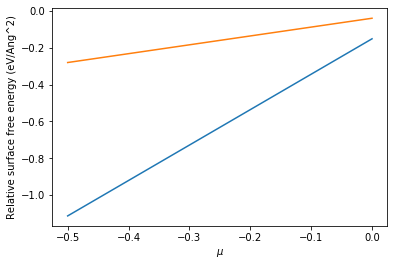

In [97]:
plt.plot(*gamma4.T, label='Gamma=4')
plt.plot(*gamma1.T, label='Gamma=1')
plt.xlabel("$\mu$")
plt.ylabel("Relative surface free energy (eV/Ang^2)")
plt.show()

## ZrC

1. Generate 100, 110 and 111 ZrC surfaces.
2. Compute thee SCF energy for each surface.
3. Consider which suface facets will be present based on the ratios:

$\frac{\gamma_{100}}{\gamma_{110}} < \frac{1}{\sqrt{2}}$,

$\frac{\gamma_{110}}{\gamma_{111}} < \frac{\sqrt{2}}{\sqrt{3}}$,

$\frac{\gamma_{111}}{\gamma_{100}} < \frac{\sqrt{3}}{\sqrt{1}}$.

4. Calculate the oxygen adsorption energy energy for different oxygen adsorption configurations.
5. Find the oxygen termination vs temperature. $\mu_O(T,p) = \Delta g_{O_2}(T, p_0) + k_B T\,\text{ln}(p/p_0)$, with $\Delta g_{O_2}(T, p_0)$ available from tabulated data. 
